In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

#### Strategies based on bollinger band
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import datetime as dt

%matplotlib inline

In [ ]:
df_aapl = pd.read_csv('/content/AAPL (1).csv', index_col='Date', parse_dates=True)
df_vix = pd.read_csv('/content/^VIX.csv', index_col='Date', parse_dates=True)
df_tsla = pd.read_csv('/content/TSLA.csv',index_col='Date', parse_dates=True)
df_tsla.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-09-03  44.816002  45.790001  44.632000  45.001999  45.001999  26770500
2019-09-04  45.377998  45.692001  43.841999  44.136002  44.136002  28805000
2019-09-05  44.500000  45.959999  44.169998  45.916000  45.916000  36976500
2019-09-06  45.439999  45.928001  45.034000  45.490002  45.490002  20947000
2019-09-09  46.000000  46.751999  45.846001  46.358002  46.358002  24013500

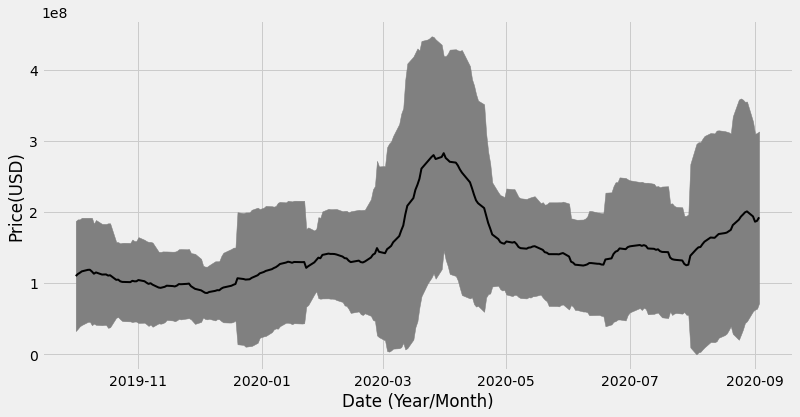

In [ ]:
sma = df_aapl['Volume'].rolling(window=21).mean()
symbol = 'AAPL'
# calculate the standar deviation
rstd = df_aapl['Volume'].rolling(window=21).std()

upper_band = sma + 2 * rstd
# upper_band = upper_band.rename(columns={symbol: 'upper'})

lower_band = sma - 2 * rstd
# lower_band = lower_band.rename(columns={symbol: 'lower'})
m_avg = sma

df_aapl['Upper'] = upper_band #throws an error here
df_aapl['Lower'] = lower_band
df_aapl['M avg'] = m_avg


col = 'Volume'
start = '2019'
end = '2020'

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_aapl['2019':'2020'].index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_aapl[start:end]['Upper'], 
                df_aapl[start:end]['Lower'], 
                color='grey')

# ax.plot(x_axis, df_aapl[start:end][col], color='blue', lw=2)
ax.plot(x_axis, df_aapl[start:end]['M avg'], color='black', lw=2)

# Set Title & Show the Image

ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show();




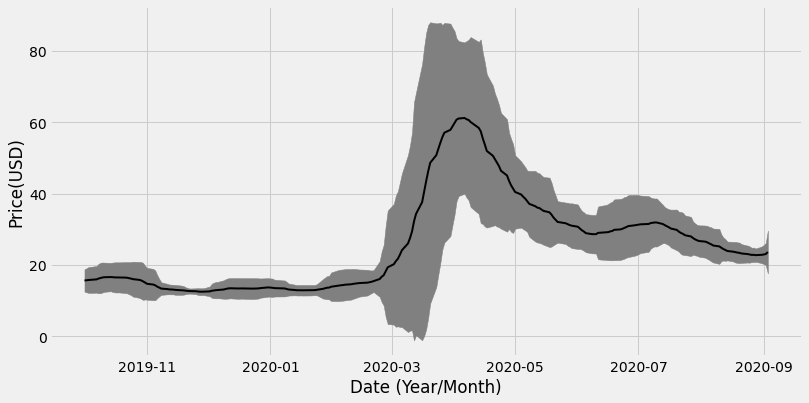

In [ ]:
sma = df_vix['Adj Close'].rolling(window=21).mean()
symbol = 'AAPL'
# calculate the standar deviation
rstd = df_vix['Adj Close'].rolling(window=21).std()

upper_band = sma + 2 * rstd
# upper_band = upper_band.rename(columns={symbol: 'upper'})

lower_band = sma - 2 * rstd
# lower_band = lower_band.rename(columns={symbol: 'lower'})
m_avg = sma

df_vix['Upper'] = upper_band #throws an error here
df_vix['Lower'] = lower_band
df_vix['M avg'] = m_avg


col = 'Close'
start = '2019'
end = '2020'

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_vix['2019':'2020'].index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_vix[start:end]['Upper'], 
                df_vix[start:end]['Lower'], 
                color='grey')

# ax.plot(x_axis, df_vix[start:end][col], color='blue', lw=2)
ax.plot(x_axis, df_vix[start:end]['M avg'], color='black', lw=2)

# Set Title & Show the Image

ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show();

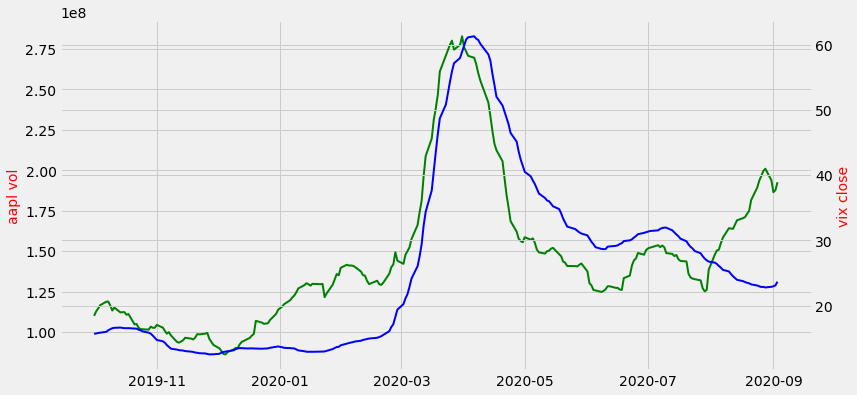

In [ ]:
sma1 = df_aapl['Volume'].rolling(window=21).mean()
sma2 = df_vix['Adj Close'].rolling(window=21).mean()
sma3 = df_tsla['Volume'].rolling(window=21).mean()


df_aapl['M avg'] = sma1
df_vix['M avg'] = sma2
df_tsla['M avg'] = sma3


plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.subplots(1)

# Get index values for the X axis for the DataFrame
x_axis1 = df_vix['2019':'2020'].index.get_level_values(0)
x_axis2 = df_aapl['2019':'2020'].index.get_level_values(0)

ax.set_ylabel("aapl vol",color="red",fontsize=14)
# ax.yscale('log')
ax2=ax.twinx()
ax2.set_ylabel("vix close",color="red",fontsize=14)
# ax.plot(x_axis, df_vix[start:end][col], color='blue', lw=2)
ax.plot(x_axis1, df_aapl[start:end]['M avg'], color='green', lw=2)
# ax.plot(x_axis1, df_tsla[start:end]['M avg'], color='red', lw=2)
ax2.plot(x_axis2, df_vix[start:end]['M avg'], color='blue', lw=2)



In [ ]:
today = dt.datetime.today().strftime('%Y-%m-%d') 

def returnFromDate(ticker, date, quantity):
    prev = pdr.DataReader(ticker, 'yahoo', date)['Adj Close'][date]
    cur = pdr.DataReader(ticker, 'yahoo', today)['Adj Close'][today]
    return (cur - prev) * quantity

In [ ]:
returnFromDate('TSLA','2020-01-02', 20)

6418.9599609375

In [ ]:
pdr.DataReader('TSLA', 'yahoo', '2020-01-02')['Adj Close']['2020-01-02']*20


1721.0400390625